# M√©todos Numericos 2022

## Final - 10 de Agosto de 2022 - Tema 1

### No olvide ingresar su(s):

**APELLIDO(S):**

**NOMBRE(S):**

Al **finalizar el examen**, Ud. tiene que **subir** la notebook al **Moodle** (aula virtual)

https://famaf.aulavirtual.unc.edu.ar

y enviar por email una copia de seguridad al profesor del te√≥rico, Francisco A. Tamarit (Pancho)

  [francisco.tamarit@unc.edu.ar](francisco.tamarit@unc.edu.ar)
    
Si por alguna eventualidad no puede subir el examen al Moodle, alternativamente, env√≠e el examen por email a los profesores del pr√°ctico de Julia, Oscar Reula oreula@unc.edu.ar y Juan I. Perotti juan.perotti@unc.edu.ar.

### Nota sobre la programaci√≥n en Julia

Recuerde que su notebook tiene que poder ser entendida por otra persona. Para ello:

* Cuando crea conveniente, use texto Markdown para desarrollar o comentar una idea.

* Si lo considera necesario, agregue comentarios a su c√≥digo.

* Realice gr√°ficos que tengan etiquetas en los ejes y leyendas para cada curva o serie de puntos graficados, como as√≠ tambi√©n un t√≠tulo apropiado.

* Procure respetar reglas de buena programaci√≥n:

    * Use sangr√≠as adecuadamente.

    * Cuando sea posible, implemente funciones de caracter general, en vez de c√≥digo espec√≠fico a cada problema, facilitando as√≠ la reutilizaci√≥n de c√≥digo.

    * Implemente funciones que tengan los argumentos necesarios para su buen funcionamiento.
   
* **NOTA:** Durante la **correcci√≥n**, el comando `Kernel -> Restart & Run All` es ejecutado, de manera que la notebook es reiniciada y todas sus celdas son recalculadas *a limpio*, borrando todos los datos anteriores. Por lo tanto, **antes de entregar**, asegurese de ejecutar el comando `Kernel -> Restart & Run All` del men√∫, cerci√≥randose que todas las celdas se ejecutan de forma debida.

In [14]:
using Plots
using LaTeXStrings
import Pkg; Pkg.add("LsqFit")
using LsqFit
import Pkg; Pkg.add("GLM")
using GLM
#using DataFrames
#using CSV

   Resolving package versions...
  No Changes to `/opt/julia/global-depot/environments/v1.8/Project.toml`
  No Changes to `/opt/julia/global-depot/environments/v1.8/Manifest.toml`
   Resolving package versions...
   Installed ShiftedArrays ‚îÄ v2.0.0
   Installed GLM ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ v1.8.3
   Installed StatsModels ‚îÄ‚îÄ‚îÄ v0.7.2
    Updating `/opt/julia/global-depot/environments/v1.8/Project.toml`
‚åÉ [38e38edf] + GLM v1.8.3
    Updating `/opt/julia/global-depot/environments/v1.8/Manifest.toml`
‚åÉ [38e38edf] + GLM v1.8.3
  [1277b4bf] + ShiftedArrays v2.0.0
‚åÉ [3eaba693] + StatsModels v0.7.2
        Info Packages marked with ‚åÉ have new versions available and may be upgradable.
Precompiling project...
  ‚úì ShiftedArrays
  ‚úì StatsModels
  ‚úì GLM
  3 dependencies successfully precompiled in 3 seconds. 179 already precompiled.


In [3]:
#import Pkg; Pkg.add("DataFrames")

## Problema 1

Realice los c√°lculos empleando los m√©todos del **trapecio** y de **Simpson**.

**a)** Para cada m√©todo, escriba un programa que calcule una aproximaci√≥n $A_n$ a la integral
$$
I = \int_0^{\pi/2} x^2 \cos(x) dx = (\pi /2)^2 - 2            
$$
para distintos valores del n√∫mero de intervalos $n$ donde se evaluar√° la funci√≥n que se desea integrar. 

**b)** Grafique la funci√≥n a integrar en el intervalo de inter√©s.

**c)** Para cada m√©todo, calcule un vector de componentes $A_n$ para $n = 2^k $ con $k=1,...,12$.

**d)** Para cada m√©todo y para los mismos valores de $n$, calcule un vector cuyas componentes sean los errores relativos $\varepsilon_n = |A_n - I|/|I|$.

**e)** Teniendo en cuenta que $h=\pi/(2n)$, verifique para los diferentes valores de $h$ (i.e. de $n$) que el cociente de precisi√≥n definido como
$$
Q = \frac{\varepsilon(h)}{\varepsilon(h/2)} \, ,
$$
toma un valor aproximado a $4$ cuando se usa la regla del **trapecio**, y un valor aproximado a $16$ cuando se usa la regla de **Simpson**. Teniendo en cuenta la expresi√≥n del error de truncamiento en cada caso, justifique este resultado.

**f)** Genere un gr√°fico **log-log** comparativo de los errores relativos. Es decir, en un mismo gr√°fico, grafique  el error relativo $\epsilon_n$ vs $n$ obtenido con cada m√©todo. Observe que
$$
\epsilon_n \approx Cn^\alpha \Rightarrow \log \epsilon_n = \alpha \log n + \ln C.
$$
donde $C$ es una constante.
Esto significa que una dependencia tipo ley de potencias aparece como una l√≠nea recta en un gr√°fico **log-log**. Use el gr√°fico para estimar el exponente $\alpha$ en las leyes de potencia. Agrege al gr√°fico curvas de la forma $f(n)=A \times n^{-\beta}$ vs $n$, siendo $\beta$ el exponente apropiado para cada caso.

**g)** Justifique los valores de $\beta$ hallados.

**Rta 1.a)**

In [4]:
#1-a)
using Printf
f(x)=x^2*cos(x)
# Regla del Punto Medio
function midpoint_rule(a, b)
    mid=(a+b)/2
    return (b-a)*f(mid)
end
# Regla del Trapecio
function trapezoidal_rule(a, b)
    return (b-a)/2*(f(a)+f(b))
end
# Regla de Simpson
function simpson_rule(a, b)
    mid=(a+b)/2 
    return (b-a)/6*(f(a)+4*f(mid)+f(b))
end
# Valores del intervalo
a=0
b=œÄ / 2
# Valores de n para evaluar
n_values = [1, 2, 4, 10]
# Resultado exacto de la integral
exact_result=(œÄ/2)^2-2
println("Valor exacto de la integral: ", exact_result)
# C√°lculos y resultados
println("\nRegla del Punto Medio:")
for n in n_values
    h=(b-a)/n
    approx=0.0
    for i in 0:(n-1)
        approx+=midpoint_rule(a+i*h, a+(i+1)*h)
    end
    println("n=$n, Aproximaci√≥n = ", approx, ", Error = ", abs(approx-exact_result))
end
println("\nRegla del Trapecio:")
for n in n_values
    h=(b-a)/n
    approx = 0.0
    for i in 0:(n-1)
        approx+=trapezoidal_rule(a+i*h,a+(i+1)*h)
    end
    println("n=$n, Aproximaci√≥n = ", approx, ", Error = ", abs(approx - exact_result))
end
println("\nRegla de Simpson:")
for n in n_values
    if n % 2==0
        h =(b-a)/n
        approx = 0.0
        for i in 0:(n-1)
            approx+=simpson_rule(a + i*h, a + (i+1)*h)
        end
        println("n=$n, Aproximaci√≥n = ", approx, ", Error = ", abs(approx - exact_result))
    else
        println(" =$n, debe ser par para el m√©todo de Simpson.")
    end
end

Valor exacto de la integral: 0.4674011002723395

Regla del Punto Medio:
n=1, Aproximaci√≥n = 0.6851483906245723, Error = 0.21774729035223284
n=2, Aproximaci√≥n = 0.5290482807352344, Error = 0.06164718046289486
n=4, Aproximaci√≥n = 0.4831512700349365, Error = 0.01575016976259702
n=10, Aproximaci√≥n = 0.46993517324035194, Error = 0.0025340729680124463

Regla del Trapecio:
n=1, Aproximaci√≥n = 1.1866167965626997e-16, Error = 0.4674011002723394
n=2, Aproximaci√≥n = 0.3425741953122862, Error = 0.12482690496005328
n=4, Aproximaci√≥n = 0.4358112380237603, Error = 0.03158986224857918
n=10, Aproximaci√≥n = 0.4623307058778377, Error = 0.005070394394501798

Regla de Simpson:
 =1, debe ser par para el m√©todo de Simpson.
n=2, Aproximaci√≥n = 0.4668902522609183, Error = 0.0005108480114212055
n=4, Aproximaci√≥n = 0.46737125936454443, Error = 2.9840907795064542e-5
n=10, Aproximaci√≥n = 0.4674003507861805, Error = 7.494861590240376e-7


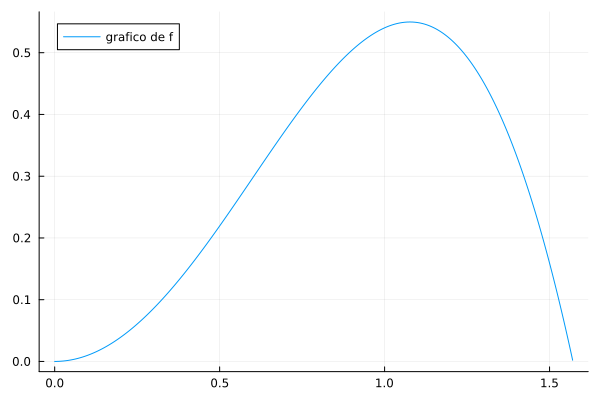

In [5]:
#1-b)
f(x)=(x^2)*cos(x)
plot(0:0.001:œÄ/2,f,label="grafico de f")

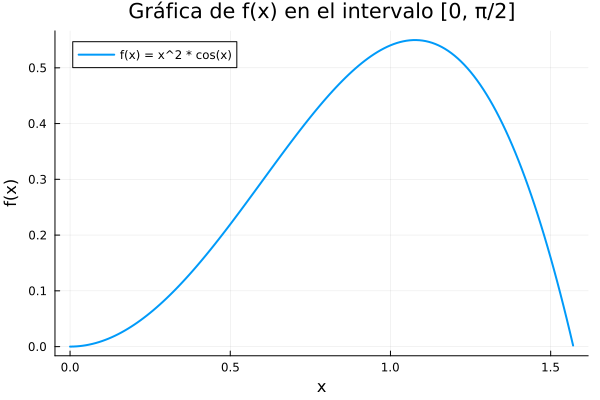

In [6]:
#1-b)
using Plots
f(x) = x^2*cos(x)
a=0
b=œÄ/2
plot(a:0.01:b,f, label="f(x) = x^2 * cos(x)", xlabel="x", ylabel="f(x)", title="Gr√°fica de f(x) en el intervalo [0, œÄ/2]", linewidth=2)

In [7]:
#1-c)
using Printf
f(x)=x^2*cos(x)
# M√©todo del Trapecio
function trapezoidal(a, b, n)
    h=(b-a)/n
    sum=0.5*(f(a)+f(b))
    for i in 1:(n-1)
        sum+=f(a+i*h)
    end
    return h*sum
end
# M√©todo de Simpson
function simpson(a, b, n)
    if n % 2 != 0
        error("n debe ser un n√∫mero par para el m√©todo de Simpson")
    end
    h=(b-a)/n
    sum=f(a)+f(b)
    for i in 1:2:(n-1)
        sum+=4*f(a+i*h)
    end
    for i in 2:2:(n-2)
        sum+=2*f(a + i*h)
    end
    return (h/3)*sum
end
# Valores del intervalo
a=0
b=œÄ/2
# Valores de k para evaluar
k_values = 1:12
# Vectores para almacenar las aproximaciones
trapecio_results=Float64[]
simpson_results=Float64[]
# Calculo y almaceno los resultados
println("\nM√©todo del Trapecio:")
for k in k_values
    n=2^k
    approx=trapezoidal(a, b, n)
    push!(trapecio_results, approx)
    println("n = $n, Aproximaci√≥n = ", approx)
end
println("\nM√©todo de Simpson:")
for k in k_values
    n = 2^k
    if n%2==0
        approx=simpson(a, b, n)
        push!(simpson_results, approx)
        println("n = $n, Aproximaci√≥n = ", approx)
    else
        println("n = $n, debe ser par para el m√©todo de Simpson.")
    end
end
# Resultados
trapecio_results
simpson_results


M√©todo del Trapecio:
n = 2, Aproximaci√≥n = 0.3425741953122862
n = 4, Aproximaci√≥n = 0.43581123802376037
n = 8, Aproximaci√≥n = 0.4594812540293484
n = 16, Aproximaci√≥n = 0.46541976354771075
n = 32, Aproximaci√≥n = 0.4669056805094859
n = 64, Aproximaci√≥n = 0.46727723998847753
n = 128, Aproximaci√≥n = 0.4673701348675165
n = 256, Aproximaci√≥n = 0.46739335890026923
n = 512, Aproximaci√≥n = 0.4673991649280183
n = 1024, Aproximaci√≥n = 0.4674006164361774
n = 2048, Aproximaci√≥n = 0.4674009793132938
n = 4096, Aproximaci√≥n = 0.4674010700325769

M√©todo de Simpson:
n = 2, Aproximaci√≥n = 0.4567655937497149
n = 4, Aproximaci√≥n = 0.4668902522609183
n = 8, Aproximaci√≥n = 0.4673712593645444
n = 16, Aproximaci√≥n = 0.46739926672049814
n = 32, Aproximaci√≥n = 0.46740098616341086
n = 64, Aproximaci√≥n = 0.46740109314814127
n = 128, Aproximaci√≥n = 0.4674010998271958
n = 256, Aproximaci√≥n = 0.46740110024452003
n = 512, Aproximaci√≥n = 0.4674011002706007
n = 1024, Aproximaci√≥n = 0.46740110027

12-element Vector{Float64}:
 0.4567655937497149
 0.4668902522609183
 0.4673712593645444
 0.46739926672049814
 0.46740098616341086
 0.46740109314814127
 0.4674010998271958
 0.46740110024452003
 0.4674011002706007
 0.46740110027223125
 0.46740110027233367
 0.4674011002723386

In [8]:
#1-d)
# Funci√≥n que quiero integrar
function f(x)
    return x^2*cos(x)
end
# Regla simple del punto medio
function punto_medio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x_mid=a+(i+0.5)*delta_x
        integral+=f(x_mid)*delta_x
    end
    return integral
end
# Regla simple del trapecio
function trapecio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        integral+=(f(a+i*delta_x)+f(a+(i+1)*delta_x))*delta_x/2
    end
    return integral
end
# Regla simple de Simpson
function simpson(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x0=a+i*delta_x
        x1=a+(i+0.5)*delta_x
        x2=a+(i+1)*delta_x
        integral+=(f(x0)+4*f(x1)+f(x2))*delta_x/6
    end
    return integral
end
# Intervalo que quiero
a=0
b=œÄ/2
# Valor exacto de mi integral
exact=(œÄ/2)^2-2
# Valores de n (potencias de 2)
valores_n=2 .^(1:12)
# Vectores para almacenar los resultados
epsilon_punto_medio=zeros(length(valores_n))
epsilon_trapecio=zeros(length(valores_n))
epsilon_simpson=zeros(length(valores_n))
# Calculo los vectores de errores relativos para cada m√©todo
for (i, n) in enumerate(valores_n)
    A_punto_medio=punto_medio(a, b, n)
    A_trapecio=trapecio(a, b, n)
    A_simpson=simpson(a, b, n)
    epsilon_punto_medio[i]=abs(A_punto_medio - exact) / abs(exact)
    epsilon_trapecio[i]=abs(A_trapecio-exact)/abs(exact)
    epsilon_simpson[i]=abs(A_simpson-exact)/abs(exact)
end
# Resultados
println("Errores relativos para cada m√©todo:")
println("Punto Medio: ", epsilon_punto_medio)
println("Trapecio: ", epsilon_trapecio)
println("Simpson: ", epsilon_simpson)

Errores relativos para cada m√©todo:
Punto Medio: [0.13189352876357166, 0.03369733137859519, 0.008466331789608145, 0.0021191588944578744, 0.0005299499615750411, 0.0001324974934372653, 3.312499836507022e-5, 8.281288651031844e-6, 2.0703246039542596e-6, 5.175813045821192e-7, 1.2939533558739146e-7, 3.234883321394592e-8]
Trapecio: [0.2670659202285161, 0.06758619573247215, 0.016944432176938484, 0.004239050193665109, 0.0010599456496038552, 0.00026499784401452586, 6.625017528845211e-5, 1.656258846175033e-5, 4.140649904587266e-6, 1.0351626510884796e-6, 2.587906742626874e-7, 6.469766749678184e-8]
Simpson: [0.0010929542337909579, 6.384432509384702e-5, 3.9228659074372675e-6, 2.441349163745643e-7, 1.524215105972805e-8, 9.523800379906593e-10, 5.951935804886935e-11, 3.7193808959721466e-12, 2.32305426206901e-13, 1.4845694415062693e-14, 4.750622212820062e-16, 5.938277766025078e-16]


Cocientes de precisi√≥n Q para la regla del trapecio:
[3.951486207119109, 3.9886964063899137, 3.9972237654228437, 3.9993090166928984, 3.999827445938595, 3.999956873483426, 3.999989219164044, 3.999997305592361, 3.9999993240031877, 3.9999998223959574, 4.000000066085226]
Cocientes de precisi√≥n Q para la regla de Simpson:
[17.11905063111539, 16.274919051606147, 16.06843447751081, 16.01709072544254, 16.00427397857486, 16.001181283048986, 16.002490660024907, 16.010736196319016, 15.648, 31.249999999999996, 0.8]


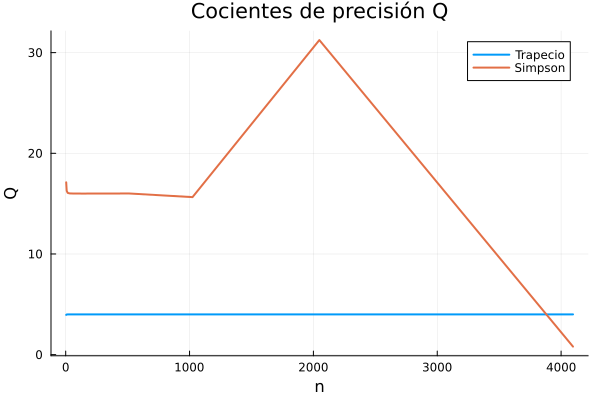

In [9]:
#1-e)
using Printf
# Funci√≥n para integrar
function f(x)
    return x^2*cos(x)
end
# Regla simple del punto medio
function punto_medio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x_mid=a+(i+0.5)*delta_x
        integral+=f(x_mid)*delta_x
    end
    return integral
end
# Regla simple del trapecio
function trapecio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        integral+=(f(a+i*delta_x)+f(a+(i+1)*delta_x))*delta_x /2
    end
    return integral
end
# Regla simple de Simpson
function simpson(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x0=a+i*delta_x
        x1=a+(i+0.5)*delta_x
        x2=a+(i+1)*delta_x
        integral+=(f(x0)+4*f(x1)+f(x2))*delta_x/6
    end
    return integral
end
# Mi intervalo 
a=0
b=œÄ/2
# Valor exacto de la integral
exact=(œÄ/2)^2-2
# Valores de n (potencias de 2)
valores_n=2 .^(1:12)
# Vectores para almacenar los errores relativos
epsilon_trapecio=zeros(length(valores_n))
epsilon_simpson=zeros(length(valores_n))
# Calculo los errores relativos para cada m√©todo
for (i, n) in enumerate(valores_n)
    A_trapecio=trapecio(a, b, n)
    A_simpson=simpson(a, b, n)
    
    epsilon_trapecio[i]=abs(A_trapecio-exact)/abs(exact)
    epsilon_simpson[i]=abs(A_simpson-exact)/abs(exact)
end
# Calculo los cocientes de precisi√≥n Q
Q_trapecio=zeros(length(valores_n)-1)
Q_simpson=zeros(length(valores_n)-1)
for i in 2:length(valores_n)
    Q_trapecio[i-1]=epsilon_trapecio[i-1]/epsilon_trapecio[i]
    Q_simpson[i-1]=epsilon_simpson[i-1]/epsilon_simpson[i]
end
# Resultados
println("Cocientes de precisi√≥n Q para la regla del trapecio:")
println(Q_trapecio)
println("Cocientes de precisi√≥n Q para la regla de Simpson:")
println(Q_simpson)
# Grafico mis resultados
using Plots
plot(valores_n[2:end], Q_trapecio, label="Trapecio", xlabel="n", ylabel="Q", title="Cocientes de precisi√≥n Q", lw=2)
plot!(valores_n[2:end], Q_simpson, label="Simpson", lw=2)

In [19]:
#1-f)
using Printf
using Plots
using LinearAlgebra
function f(x)
    return x^2*cos(x)
end
# Regla simple del punto medio
function punto_medio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x_mid=a+(i+0.5)*delta_x
        integral+=f(x_mid)*delta_x
    end
    return integral
end
# Regla simple del trapecio
function trapecio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        integral+=(f(a+i*delta_x)+f(a+(i+1)*delta_x))*delta_x/2
    end
    return integral
end
# Regla simple de Simpson
function simpson(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x0=a+i*delta_x
        x1=a+(i+0.5)*delta_x
        x2=a+(i+1)*delta_x
        integral+=(f(x0)+4*f(x1)+f(x2))*delta_x/6
    end
    return integral
end
# Intervalo que quiero.
a=0
b=œÄ/2
# Valor exacto de la integral
exact=(œÄ/2)^2-2
# Valores de n (potencias de 2)
valores_n=2 .^(1:12)
# Vectores para almacenar los errores relativos
epsilon_trapecio=zeros(length(valores_n))
epsilon_simpson=zeros(length(valores_n))
# Calculo los errores relativos para cada m√©todo
for (i, n) in enumerate(valores_n)
    A_trapecio=trapecio(a, b, n)
    A_simpson=simpson(a, b, n)
    
    epsilon_trapecio[i]=abs(A_trapecio-exact)/abs(exact)
    epsilon_simpson[i]=abs(A_simpson-exact)/abs(exact)
end
# Gr√°fico log-log comparativo de los errores relativos
plot(log10.(valores_n), log10.(epsilon_trapecio), label="Trapecio", xlabel="log(n)", ylabel="log(Œµ‚Çô)", title="Errores relativos log-log", lw=2)
plot!(log10.(valores_n), log10.(epsilon_simpson), label="Simpson", lw=2)
# Ajuste l√≠neas rectas a los datos log-log para estimar Œ±
log_n=log10.(valores_n)
log_epsilon_trapecio=log10.(epsilon_trapecio)
log_epsilon_simpson=log10.(epsilon_simpson)
# Ajuste lineal para el m√©todo del trapecio
coeffs_trapecio=fit(log_n, log_epsilon_trapecio, 1)
alpha_trapecio=coeffs_trapecio[1]
println("Exponente Œ± para el m√©todo del trapecio: ", alpha_trapecio)
# Ajuste lineal para el m√©todo de Simpson
coeffs_simpson=fit(log_n, log_epsilon_simpson, 1)
alpha_simpson=coeffs_simpson[1]
println("Exponente Œ± para el m√©todo de Simpson: ", alpha_simpson)
# Agrego curvas de la forma f(n)=Axn^(-Œ≤)
Œ≤_trapecio=2  # Exponente te√≥rico para el m√©todo del trapecio
Œ≤_simpson=4  # Exponente te√≥rico para el m√©todo de Simpson
# Calculo las curvas
A_trapecio=10^coeffs_trapecio[2]
A_simpson=10^coeffs_simpson[2]
f_trapecio(n)=A_trapecio*n^(-Œ≤_trapecio)
f_simpson(n)=A_simpson*n^(-Œ≤_simpson)
plot!(log10.(valores_n), log10.(f_trapecio.(valores_n)), label="Trapecio (Te√≥rico)", linestyle=:dash, lw=2)
plot!(log10.(valores_n), log10.(f_simpson.(valores_n)), label="Simpson (Te√≥rico)", linestyle=:dash, lw=2)
# Gr√°fico
display(plot)

LoadError: MethodError: no method matching fit(::Vector{Float64}, ::Vector{Float64}, ::Int64)
[0mClosest candidates are:
[0m  fit([91m::Type{D}[39m, ::Any...) where D<:Distributions.Distribution at /opt/julia/global-depot/packages/Distributions/YQQXX/src/genericfit.jl:34
[0m  fit([91m::Type{StatsBase.Histogram}[39m, ::Any...; kwargs...) at /opt/julia/global-depot/packages/StatsBase/XgjIN/src/hist.jl:407
[0m  fit([91m::Type{<:Distributions.Cauchy}[39m, ::AbstractArray{T}) where T<:Real at /opt/julia/global-depot/packages/Distributions/YQQXX/src/univariate/continuous/cauchy.jl:110
[0m  ...

## 1-g)
Los valores te√≥ricos de ùõΩ provienen de estas dependencias de los errores de truncamiento:
M√©todo del Trapecio:
El error es proporcional a ‚Ñé^2. Cuando ‚Ñé se reduce a la mitad (duplicar n), el error se reduce en un factor de 4
En t√©rminos de ùëõ, el error relativo ùúñ ‚àù ùëõ^(‚àí2)
Por lo tanto, el valor esperado de ùõΩ es 2
M√©todo de Simpson:
El error es proporcional a ‚Ñé^4. Cuando ‚Ñé se reduce a la mitad (duplicar ùëõ), el error se reduce en un factor de 16
En t√©rminos de n, el error relativo ùúñ_ùëõ ‚àù ùëõ^(‚àí4)
Por lo tanto, el valor esperado de ùõΩ 4
Estos valores se justifican porque la dependencia del error en funci√≥n del tama√±o del subintervalo ‚Ñé directamente se traduce en c√≥mo el error disminuye cuando ùëõ aumenta.
A continuaci√≥n, mostramos el gr√°fico log-log comparativo para verificar esta relaci√≥n y comparar con los exponentes te√≥ricos

In [15]:
using Printf
using Plots
using GLM
using DataFrames
# Funci√≥n a integrar
function f(x)
    return x^2*cos(x)
end
# Regla simple del punto medio
function punto_medio(a, b, n)
    delta_x=(b-a)/n
    integral=0.0
    for i in 0:n-1
        x_mid=a+(i+0.5)*delta_x
        integral+=f(x_mid)*delta_x
    end
    return integral
end
# Regla simple del trapecio
function trapecio(a, b, n)
    delta_x=(b-a)/n
end

trapecio (generic function with 1 method)

## Problema 2

*Romeo y Julieta: una historia de amor din√°mica*.

Aqu√≠ se modelan las emociones oscilantes que sienten Romeo y su bella Julieta mientras se alimentan mutuamente de la pasi√≥n y la indiferencia.

Las variables se definen de la siguiente manera. Sean $R(t)$ los sentimientos de Romeo por Julieta en el momento $t$ y $J(t)$ los sentimientos de Julieta por Romeo en el momento $t$. Supongamos que los valores positivos de $R$ y $J$ significan amor, pasi√≥n y atracci√≥n, mientras que los valores negativos significan disgusto y $R = J = 0$ significa indiferencia.

En la versi√≥n m√°s simple del modelo, el cambio de sentimientos de Julieta depende s√≥lo de los sentimientos actuales de Romeo y viceversa. Entonces podemos proponer un modelo de la siguiente manera:
$$
 \frac{dR}{dt} = a J
$$


$$
 \frac{dJ}{dt} = -b R
 \label{Jt}
$$

donde los par√°metros $a$ y $b$ son n√∫meros reales positivos y tienen unidades de $1/tiempo$.

**a)** Escriba un programa a los fines de resolver el problema de valor inicial $n$-dimensional:
$$
y^{\prime} = f(t,y), \qquad a\le t\le b, \qquad y(a)=\alpha
$$
que utilice el m√©todo de **Euler**

\begin{eqnarray*}
h   &=& (b-a)/(n-1) \\
t_1 &=& a \\
t_n &=& b \\
w_1 &=& \alpha, \\
t_{i+1}&=& t_i + h
w_{i+1}&=& w_i + h f(t_i,w_i) \\
\end{eqnarray*}

para $i\in\{1,2,...,n-1\}$, y donde

$$y         =(y_1,y_2, ... ,y_n)$$

$$y^{\prime}=(y^{\prime}_1,y^{\prime}_2,..., y^{\prime}_n)$$

$$f(t,y)    =(f_1(t,y),f_2(t,y),..., f_n(t,y)) $$

$$\alpha    =(\alpha_1,\alpha_2,..., \alpha_n) \in \mathbb{R}^n$$

El programa debe requerir los siguientes datos de entrada:
* el intervalo temporal de integraci√≥n $(a,b)$,
* el valor inicial, $\alpha$, 
* el n√∫mero de pasos de integraci√≥n $n$,
* y un vector $p=(p_1,p_2,...)$ de par√°metros del lado derecho de la ODE.

El programa debe retornar
* un vector de tiempos $t_i$,
* y una matriz de aproximaciones $w_{ji}\approx y_j(t_i)$

**b)** Utilice el programa del punto **a)** (el de Euler) para resolver el problema de valor inicial:

$$y^{\prime}_1 = p_1 y_2$$

$$y^{\prime}_2 = -p_2 y_1$$

$$ 0 \le t \le 50$$

$$\alpha_1 = 3.14$$
 
$$\alpha_2 = -0.5$$

con $h=0.01$, $p_1 = a = 0.2$ y $p_2 = b = 0.4$.

**c)** Grafique la aproximaci√≥n a la soluci√≥n del problema de valor inicial planteado anteriormente. Es decir, en un mismo gr√°fico, grafique $y_1(t)$ vs $t$ e $y_2(t)$ vs $t$ para $0 \le t \le 50$.

**d)** Grafique $y_2$ en funci√≥n de $y_1$. 

**e)** Repita los incisos **c)**-**d)** pero con el m√©todo de **Runge-Kutta de cuarto orden**

\begin{eqnarray*}
h &=& (b-a)/(n-1), \\
t_1 &= &a, \\
t_n &= &b, \\
w_1 &= &\alpha, \\
k_1 &= & h  f(t_i,w_i), \\
k_2 &= & h  f(t_i + h/2, w_i + k_1/2), \\
k_3 &= & h  f(t_i + h/2, w_i + k_2/2)), \\
k_4 &= & h  f(t_i + h, w_i + k_3), \\
w_{i+1}&=& w_i + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)
\end{eqnarray*}

para $i\in\{1,2,...,n-1\}$.

**f)** Comente los resultados obtenidos, en particular lo observado al comparar los resultados obtenidos con √°mbos m√©todos. Ayuda: el problema que acaba de resolver es el p√©ndulo matem√°tico, que es la aproximaci√≥n de peque√±as amplitudes del p√©ndulo propiamente dicho. Sus soluciones son √≥rbitas cerradas. Puede probar con varios pasos temporales y tiempos finales.

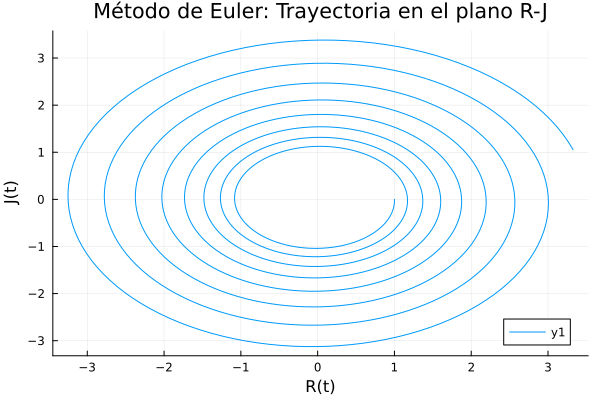

In [20]:
#2-a)
using Plots
# Sistema de ecuaciones diferenciales
function system_of_equations(t, y, p)
    a, b=p
    dR_dt=a*y[2]
    dJ_dt=-b*y[1]
    return [dR_dt, dJ_dt]
end
# M√©todo de Euler para resolver el sistema de ODEs
function euler_method(f, a, b, alpha, n, p)
    h=(b-a)/(n-1)
    t=range(a, b, length=n)
    w=zeros(length(alpha), n)
    w[:, 1]=alpha
    for i in 2:n
        w[:, i] = w[:, i - 1] + h * f(t[i - 1], w[:, i - 1], p)
    end 
    return t, w
end
# Par√°metros de entrada
a=0.0  # Inicio del intervalo temporal
b=50.0  # Fin del intervalo temporal
alpha=[1.0, 0.0]  # Valores iniciales: R(0) y J(0)
n=1000  # N√∫mero de pasos de integraci√≥n
p=[1.0, 1.0]  # Par√°metros del sistema: a y b
# Soluci√≥n usando el m√©todo de Euler
t, w = euler_method(system_of_equations, a, b, alpha, n, p)
# Grafico los resultados
plot(t, w[1, :], label="R(t)", xlabel="Tiempo", ylabel="Sentimientos", title="M√©todo de Euler: R(t) y J(t)")
plot!(t, w[2, :], label="J(t)")
# Grafico la trayectoria en el plano R-J
plot(w[1, :], w[2, :], xlabel="R(t)", ylabel="J(t)", title="M√©todo de Euler: Trayectoria en el plano R-J")

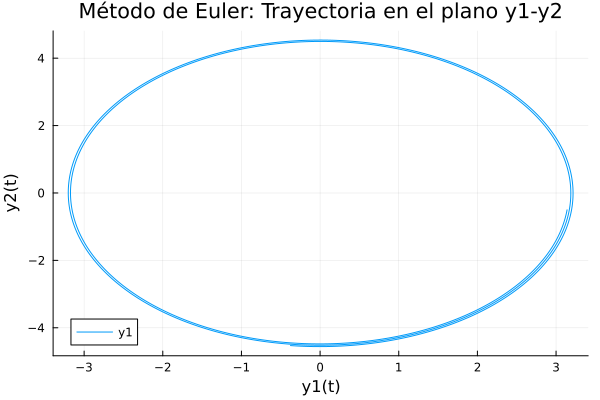

In [21]:
#2-b)
using Plots
# Sistema de ecuaciones diferenciales
function system_of_equations(t, y, p)
    p1, p2=p
    dY1_dt=p1*y[2]
    dY2_dt=-p2*y[1]
    return [dY1_dt, dY2_dt]
end
# M√©todo de Euler para resolver el sistema de ODEs
function euler_method(f, a, b, alpha, h, p)
    n=Int((b-a)/h)+1
    t=range(a, b, length=n)
    w=zeros(length(alpha), n)
    w[:, 1] = alpha
    for i in 2:n
        w[:, i] = w[:, i - 1] + h * f(t[i - 1], w[:, i - 1], p)
    end 
    return t, w
end
# Par√°metros de entrada
a=0.0  # Inicio del intervalo temporal
b=50.0  # Fin del intervalo temporal
alpha=[3.14, -0.5]  # Valores iniciales: y1(0) y y2(0)
h=0.01  # Paso temporal
p=[0.2, 0.4]  # Par√°metros del sistema: p1 y p2
# Soluci√≥n usando el m√©todo de Euler
t,w=euler_method(system_of_equations, a, b, alpha, h, p)
# Grafic√≥ los resultados
plot(t, w[1, :], label="y1(t)", xlabel="Tiempo", ylabel="Valores", title="M√©todo de Euler: y1(t) y y2(t)")
plot!(t, w[2, :], label="y2(t)")
# Grafico la trayectoria en el plano y1-y2
plot(w[1, :], w[2, :], xlabel="y1(t)", ylabel="y2(t)", title="M√©todo de Euler: Trayectoria en el plano y1-y2")

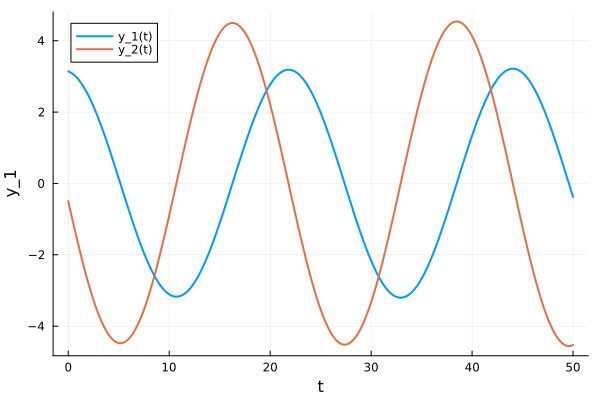

In [21]:
#2-c)
using Plots
# Funci√≥n f(t,y,p) y m√©todo de Euler
function f(t, y, p)
    dRdt=p[1]*y[2]
    dJdt=-p[2]*y[1]
    return [dRdt, dJdt]
end
function euler_method(f, a, b, alpha, n, p)
    h=(b-a)/(n-1)
    t=range(a, stop=b, length=n)
    y=zeros(length(alpha), n)
    y[:, 1] .=alpha
    for i in 2:n
        y[:, i] .= y[:, i-1] .+ h .* f(t[i-1], y[:, i-1], p)
    end 
    return t, y
end
# Par√°metros del problema
a=0
b=50
alpha=[3.14, -0.5]  # Valores iniciales de y_1 y y_2
n=5001  # N√∫mero de pasos de integraci√≥n
p=[0.2, 0.4]  # Par√°metros p_1 y p_2
# Resuelvo el problema utilizando el m√©todo de Euler
t, y=euler_method(f, a, b, alpha, n, p)
# Grafico los resultados
plot(t, y[1, :], label="y_1(t)", xlabel="t", ylabel="y_1", linewidth=2)
plot!(t, y[2, :], label="y_2(t)", linewidth=2)

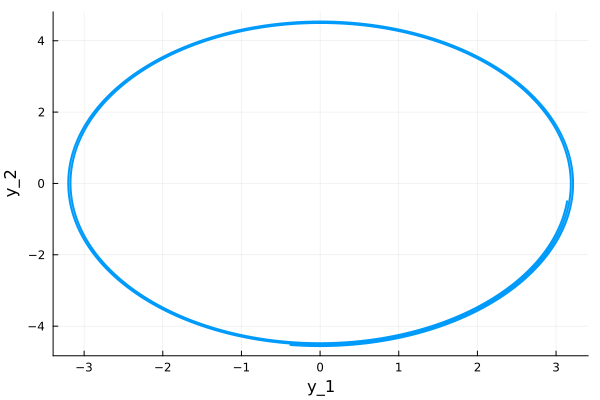

In [20]:
#2-d)
using Plots
# Funci√≥n f(t,y,p) y m√©todo de Euler
function f(t, y, p)
    dRdt=p[1]*y[2]
    dJdt=-p[2]*y[1]
    return [dRdt, dJdt]
end
function euler_method(f, a, b, alpha, n, p)
    h=(b-a)/(n-1)
    t=range(a, stop=b, length=n)
    y=zeros(length(alpha), n)
    y[:, 1] .=alpha
    for i in 2:n
        y[:, i] .= y[:, i-1] .+ h .* f(t[i-1], y[:, i-1], p)
    end
    return t, y
end
# Par√°metros del problema
a=0
b=50
alpha=[3.14, -0.5]  # Valores iniciales de y_1 y y_2
n=5001  # N√∫mero de pasos de integraci√≥n
p=[0.2, 0.4]  # Par√°metros p_1 y p_2
# Resuelvo el problema utilizando el m√©todo de Euler
t,y=euler_method(f,a,b,alpha,n,p)
# Grafico y_2 en funci√≥n de y_1
plot(y[1,:],y[2,:],xlabel="y_1",ylabel="y_2",label="",linewidth=2)

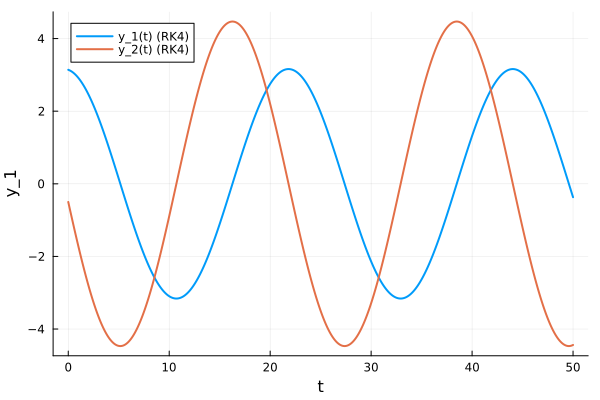

In [19]:
#2-e)
using Plots
# Funci√≥n f(t,y,p) y m√©todo de Runge-Kutta de cuarto orden
function f(t, y, p)
    dRdt=p[1]*y[2]
    dJdt=-p[2]*y[1]
    return [dRdt,dJdt]
end
function runge_kutta_4(f,a,b,alpha,n,p)
    h=(b-a)/(n-1)
    t=range(a,stop=b,length=n)
    y=zeros(length(alpha),n)
    y[:,1].=alpha
    for i in 1:n-1
        k1=h*f(t[i],y[:,i],p)
        k2=h*f(t[i]+h/2,y[:,i]+k1/2,p)
        k3=h*f(t[i]+h/2,y[:,i]+k2/2,p)
        k4=h*f(t[i]+h,y[:,i]+k3,p)
        y[:,i+1]=y[:,i]+(1/6)*(k1+2*k2+2*k3+k4)
    end
    return t, y
end
# Par√°metros del problema
a=0
b=50
alpha=[3.14,-0.5]  # Valores iniciales de y_1 y y_2
n = 5001  # N√∫mero de pasos de integraci√≥n
p = [0.2, 0.4]  # Par√°metros p_1 y p_2
# Resuelvo el problema utilizando el m√©todo de Runge-Kutta de cuarto orden
t_rk4, y_rk4=runge_kutta_4(f,a,b,alpha,n,p)
# Grafico los resultados
plot(t_rk4, y_rk4[1,:], label="y_1(t) (RK4)",xlabel="t",ylabel="y_1",linewidth=2)
plot!(t_rk4, y_rk4[2,:],label="y_2(t) (RK4)",linewidth=2)

## 2-f)
El problema del p√©ndulo matem√°tico es una aproximaci√≥n para peque√±as amplitudes del p√©ndulo real y utilizando tanto el m√©todo de Euler como el m√©todo de Runge-Kutta de cuarto orden podemos observar algunas diferencias en los resultados obtenidos.
1.	Precisi√≥n y estabilidad:
o El m√©todo de Runge-Kutta de cuarto orden es conocido por ser m√°s preciso que el m√©todo de Euler, especialmente para sistemas de ecuaciones diferenciales complejos o cuando se requiere una alta precisi√≥n.
o En el caso del p√©ndulo matem√°tico, donde las soluciones son √≥rbitas cerradas, el m√©todo de Runge-Kutta de cuarto orden tiende a producir resultados m√°s precisos y estables en comparaci√≥n con el m√©todo de Euler. Esto se debe a que el m√©todo de Runge-Kutta de cuarto orden considera m√∫ltiples pendientes en cada paso de integraci√≥n, lo que ayuda a reducir el error acumulado.
2.	Cantidad de pasos de integraci√≥n:
o En general, se requiere un menor n√∫mero de pasos de integraci√≥n para obtener resultados precisos con el m√©todo de Runge-Kutta de cuarto orden en comparaci√≥n con el m√©todo de Euler. Aunque en este caso particular del p√©ndulo matem√°tico, ambas t√©cnicas pueden requerir una cantidad similar de pasos de integraci√≥n para producir resultados satisfactorios, especialmente si se quiere una alta resoluci√≥n en la representaci√≥n de la √≥rbita cerrada.
3.	Tiempo de c√°lculo:
o El m√©todo de Runge-Kutta de cuarto orden puede ser m√°s costoso computacionalmente que el m√©todo de Euler debido a la evaluaci√≥n de m√∫ltiples pendientes en cada paso de integraci√≥n. Sin embargo, en la pr√°ctica, la diferencia en el tiempo de c√°lculo puede no ser significativa, especialmente para problemas de tama√±o moderado como el del p√©ndulo matem√°tico.

En resumen, mientras que ambos m√©todos pueden ser utilizados para resolver el problema del p√©ndulo matem√°tico, el m√©todo de Runge-Kutta de cuarto orden tiende a producir resultados m√°s precisos y estables, especialmente cuando se requiere una alta precisi√≥n o se est√°n modelando sistemas complejos. Aun asi, en algunos casos, como el del p√©ndulo matem√°tico con peque√±as amplitudes, el m√©todo de Euler puede ser adecuado si se necesitan resultados r√°pidos y aproximados.